In [4]:
import pandas as pd
import sqlite3
import json

# -------------------------------
# Step 1: Load Orders CSV
# -------------------------------
orders = pd.read_csv(r"C:\Users\Admin\Downloads\orders.csv")

print("Orders Loaded:")
print(orders.head())


# -------------------------------
# Step 2: Load Users JSON
# -------------------------------
with open(r"C:\Users\Admin\Downloads\users.json", "r") as f:
    users_data = json.load(f)

users = pd.DataFrame(users_data)

print("\nUsers Loaded:")
print(users.head())


# -------------------------------
# Step 3: Load Restaurants from SQL
# -------------------------------

# Create temporary SQLite DB
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

# Read SQL file
with open(r"C:\Users\Admin\Downloads\restaurants.sql", "r") as f:
    sql_script = f.read()

# Execute SQL script
cursor.executescript(sql_script)

# Load restaurant table into pandas
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)

print("\nRestaurants Loaded:")
print(restaurants.head())


# -------------------------------
# Step 4: Merge Datasets (LEFT JOIN)
# -------------------------------

# Merge Orders + Users
merged_1 = pd.merge(
    orders,
    users,
    how="left",
    on="user_id"
)

# Merge with Restaurants
final_data = pd.merge(
    merged_1,
    restaurants,
    how="left",
    on="restaurant_id"
)

print("\nMerged Dataset:")
print(final_data.head())


# -------------------------------
# Step 5: Save Final Dataset
# -------------------------------

final_data.to_csv(
    "final_food_delivery_dataset.csv",
    index=False
)

print("\nFinal Dataset Saved as: final_food_delivery_dataset.csv")


Orders Loaded:
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  

Users Loaded:
   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold

Restaurants Loaded:
   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     

In [5]:
import pandas as pd

df = pd.read_csv("final_food_delivery_dataset.csv")

print(df.head())
print(df.info())


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

In [8]:
print(df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')


In [10]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(
    df['order_date'],
    format="%d-%m-%Y"
)

# Check
print(df['order_date'].head())


0   2023-02-18
1   2023-01-18
2   2023-07-15
3   2023-10-04
4   2023-12-25
Name: order_date, dtype: datetime64[ns]


In [11]:
orders_per_month = df.groupby(
    df['order_date'].dt.to_period("M")
).size()

print(orders_per_month)


order_date
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load final dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

# Convert date
df['order_date'] = pd.to_datetime(
    df['order_date'],
    format="%d-%m-%Y"
)

print("Data Ready")


Data Ready


In [13]:
orders_per_month = df.groupby(
    df['order_date'].dt.to_period("M")
).size()

print(orders_per_month)


order_date
2023-01    804
2023-02    785
2023-03    903
2023-04    812
2023-05    844
2023-06    784
2023-07    859
2023-08    851
2023-09    812
2023-10    863
2023-11    807
2023-12    849
2024-01     27
Freq: M, dtype: int64


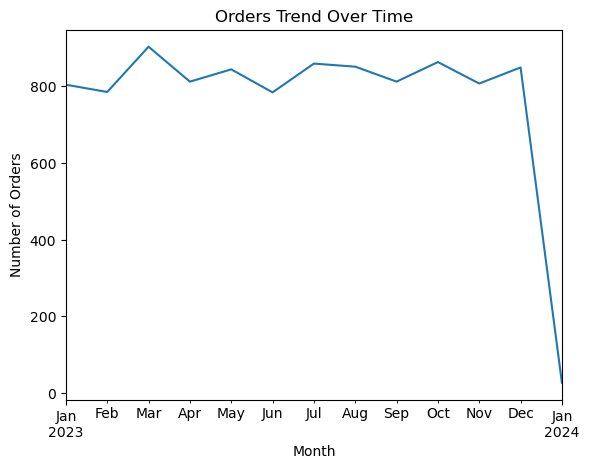

In [14]:
orders_per_month.plot()

plt.title("Orders Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


In [15]:
top_users = df.groupby('user_id')['order_id'].count() \
              .sort_values(ascending=False)

print(top_users.head(10))


user_id
2973    13
1515    12
874     11
1337    11
496     11
2       10
2640    10
358     10
2772    10
1531    10
Name: order_id, dtype: int64


In [16]:
avg_spend = df.groupby('user_id')['total_amount'].mean()

print(avg_spend.head())


user_id
1    1289.660
2     756.412
3     919.755
4     935.290
5    1148.576
Name: total_amount, dtype: float64


In [17]:
city_revenue = df.groupby('city')['total_amount'].sum() \
                 .sort_values(ascending=False)

print(city_revenue)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64


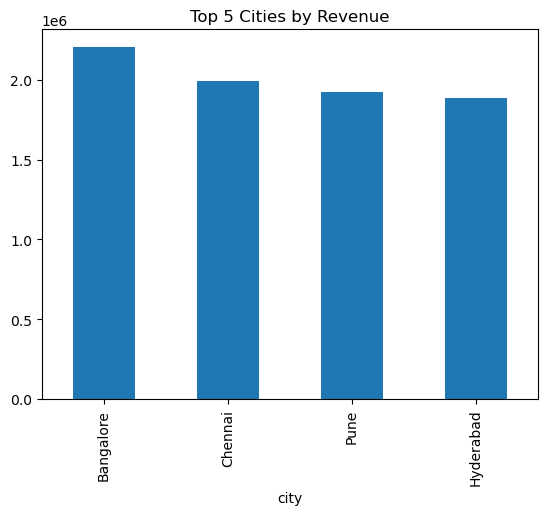

In [18]:
city_revenue.head(5).plot(kind='bar')

plt.title("Top 5 Cities by Revenue")
plt.show()


In [19]:
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum() \
                    .sort_values(ascending=False)

print(cuisine_revenue)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: total_amount, dtype: float64


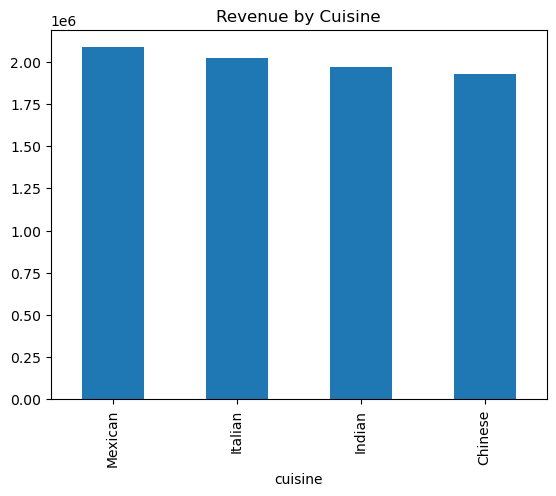

In [20]:
cuisine_revenue.plot(kind='bar')

plt.title("Revenue by Cuisine")
plt.show()


In [21]:
membership_revenue = df.groupby('membership')['total_amount'].sum()

print(membership_revenue)


membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64


In [22]:
membership_avg = df.groupby('membership')['total_amount'].mean()

print(membership_avg)


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64


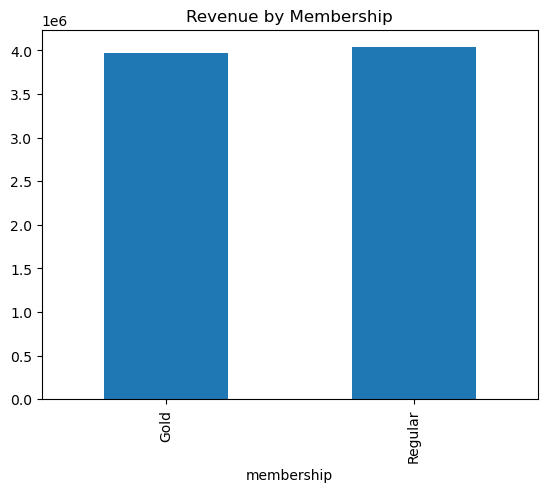

In [23]:
membership_revenue.plot(kind='bar')

plt.title("Revenue by Membership")
plt.show()


In [24]:
monthly_revenue = df.groupby(
    df['order_date'].dt.to_period("M")
)['total_amount'].sum()

print(monthly_revenue)


order_date
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
2023-06    610822.93
2023-07    688559.45
2023-08    694987.58
2023-09    653838.07
2023-10    699187.73
2023-11    637772.43
2023-12    681303.50
2024-01     17201.50
Freq: M, Name: total_amount, dtype: float64


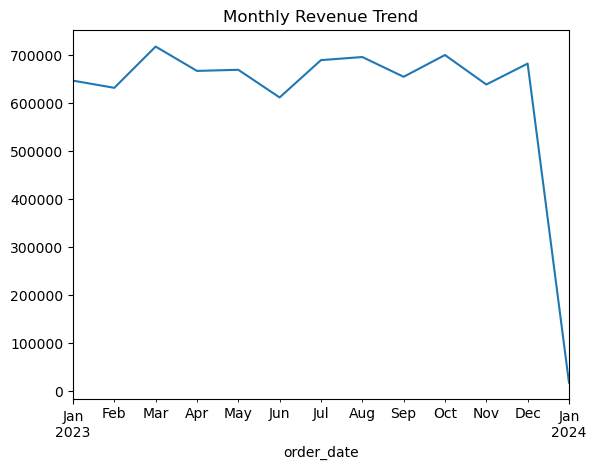

In [25]:
monthly_revenue.plot()

plt.title("Monthly Revenue Trend")
plt.show()


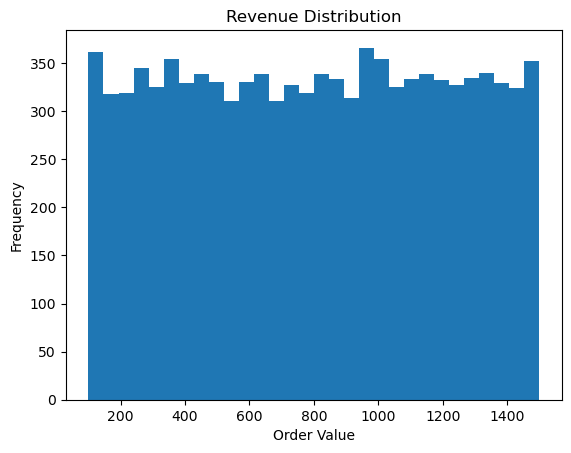

In [26]:
plt.hist(df['total_amount'], bins=30)

plt.title("Revenue Distribution")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()


In [27]:
# Total spending per user
user_total = df.groupby('user_id')['total_amount'].sum()

# Users with total > 1000
high_value_users = user_total[user_total > 1000]

# Count distinct users
count = high_value_users.count()

print("Number of users with total orders > ₹1000:", count)


Number of users with total orders > ₹1000: 2544


In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

# Create rating bins as per question
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]

df['rating_range'] = pd.cut(
    df['rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [33]:
rating_revenue = df.groupby('rating_range')['total_amount'].sum()

print(rating_revenue)


rating_range
3.0–3.5    2136772.70
3.6–4.0    1717494.41
4.1–4.5    1960326.26
4.6–5.0    2197030.75
Name: total_amount, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_20704\3994832134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = df.groupby('rating_range')['total_amount'].sum()


In [34]:
highest = rating_revenue.idxmax()

print("Highest Revenue Range:", highest)


Highest Revenue Range: 4.6–5.0


<Axes: title={'center': 'Revenue by Rating Range'}, xlabel='rating_range'>

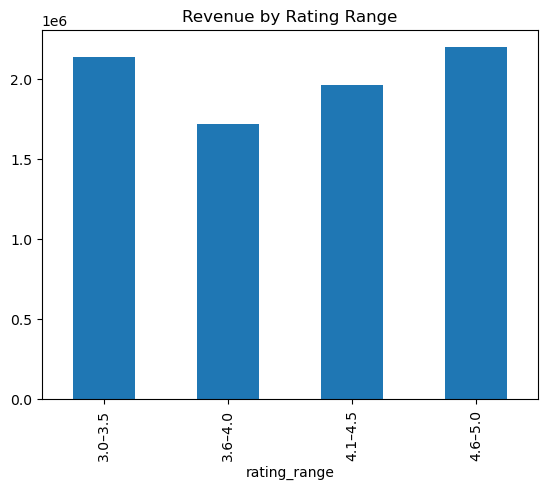

In [35]:
rating_revenue.plot(kind='bar', title="Revenue by Rating Range")


In [36]:
import pandas as pd

# Load dataset
df = pd.read_csv("final_food_delivery_dataset.csv")

# Keep only Gold users
gold_df = df[df['membership'] == 'Gold']


In [37]:
city_avg_gold = gold_df.groupby('city')['total_amount'].mean() \
                       .sort_values(ascending=False)

print(city_avg_gold)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64


In [38]:
top_city = city_avg_gold.idxmax()
top_value = city_avg_gold.max()

print("City with Highest Avg Order (Gold):", top_city)
print("Average Order Value:", round(top_value, 2))


City with Highest Avg Order (Gold): Chennai
Average Order Value: 808.46


In [39]:
import pandas as pd

df = pd.read_csv("final_food_delivery_dataset.csv")


In [40]:
cuisine_stats = df.groupby('cuisine').agg(
    num_restaurants = ('restaurant_id', 'nunique'),
    total_revenue = ('total_amount', 'sum')
).reset_index()

print(cuisine_stats)


   cuisine  num_restaurants  total_revenue
0  Chinese              120     1930504.65
1   Indian              126     1971412.58
2  Italian              126     2024203.80
3  Mexican              128     2085503.09


In [41]:
result = cuisine_stats.sort_values(
    by=['num_restaurants', 'total_revenue'],
    ascending=[True, False]
)

print(result)


   cuisine  num_restaurants  total_revenue
0  Chinese              120     1930504.65
2  Italian              126     2024203.80
1   Indian              126     1971412.58
3  Mexican              128     2085503.09


In [42]:
total_orders = len(df)

gold_orders = len(df[df['membership'] == 'Gold'])


In [43]:
percentage = (gold_orders / total_orders) * 100

rounded_percentage = round(percentage)

print("Gold Orders Percentage:", rounded_percentage, "%")


Gold Orders Percentage: 50 %


In [44]:
restaurant_stats = df.groupby('restaurant_name_x').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
).reset_index()

print(restaurant_stats.head())


                restaurant_name_x  total_orders  avg_order_value
0  Amma Biryani Family Restaurant            45       799.941556
1       Amma Biryani North Indian            57       774.900526
2       Amma Biryani South Indian            15       708.708667
3               Amma Cafe Non-Veg            24       736.174583
4          Amma Cafe North Indian            11       667.979091


In [45]:
low_volume = restaurant_stats[
    restaurant_stats['total_orders'] < 20
]


In [46]:
result = low_volume.sort_values(
    by='avg_order_value',
    ascending=False
)

print(result.head(1))


            restaurant_name_x  total_orders  avg_order_value
173  Hotel Dhaba Multicuisine            13      1040.222308


In [48]:
combo_revenue = df.groupby(
    ['city', 'cuisine', 'membership']
)['total_amount'].sum().reset_index()


In [49]:
top_combo = combo_revenue.sort_values(
    by='total_amount',
    ascending=False
).head(1)

print(top_combo)


        city  cuisine membership  total_amount
7  Bangalore  Mexican    Regular     327280.48


In [50]:
df.groupby(['city','cuisine'])['total_amount'].sum().sort_values(ascending=False).head(1)


city       cuisine
Bangalore  Mexican    571004.61
Name: total_amount, dtype: float64

In [51]:
combo2 = df.groupby(
    ['membership', 'cuisine']
)['total_amount'].sum().reset_index()

combo2 = combo2.sort_values(
    by='total_amount',
    ascending=False
)

print(combo2)


  membership  cuisine  total_amount
7    Regular  Mexican    1072943.30
6    Regular  Italian    1018424.75
3       Gold  Mexican    1012559.79
2       Gold  Italian    1005779.05
5    Regular   Indian     992100.27
1       Gold   Indian     979312.31
0       Gold  Chinese     977713.74
4    Regular  Chinese     952790.91


In [52]:
print(combo2.head(1))


  membership  cuisine  total_amount
7    Regular  Mexican     1072943.3


In [53]:
import pandas as pd

df = pd.read_csv("final_food_delivery_dataset.csv")

# Convert date column
df['order_date'] = pd.to_datetime(
    df['order_date'],
    format="%d-%m-%Y"
)


In [54]:
df['quarter'] = df['order_date'].dt.quarter


In [55]:
quarter_revenue = df.groupby('quarter')['total_amount'].sum()

print(quarter_revenue)


quarter
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: total_amount, dtype: float64


In [56]:
top_q = quarter_revenue.idxmax()

print("Highest Revenue Quarter: Q" + str(top_q))


Highest Revenue Quarter: Q3


In [57]:
gold_orders = df[df['membership'] == 'Gold'].shape[0]

print("Total Orders by Gold Members:", gold_orders)


Total Orders by Gold Members: 4987


In [58]:
hyd_df = df[df['city'] == 'Hyderabad']


In [59]:
total_revenue = hyd_df['total_amount'].sum()

rounded_revenue = round(total_revenue)

print("Total Revenue from Hyderabad: ₹", rounded_revenue)


Total Revenue from Hyderabad: ₹ 1889367


In [60]:
distinct_users = df['user_id'].nunique()

print("Distinct Users:", distinct_users)


Distinct Users: 2883


In [61]:
gold_avg = df[df['membership'] == 'Gold']['total_amount'].mean()

print("Gold Avg Order Value:", round(gold_avg, 2))


Gold Avg Order Value: 797.15


In [62]:
gold_avg = df[df['membership'] == 'Gold']['total_amount'].mean()

print("Gold Avg Order Value:", round(gold_avg, 2))


Gold Avg Order Value: 797.15


In [63]:
high_rating_orders = df[df['rating'] >= 4.5].shape[0]

print("Orders with Rating ≥ 4.5:", high_rating_orders)


Orders with Rating ≥ 4.5: 3374


In [64]:
gold_df = df[df['membership'] == 'Gold']

city_revenue_gold = gold_df.groupby('city')['total_amount'].sum()

top_city = city_revenue_gold.idxmax()

print("Top Gold City:", top_city)


Top Gold City: Chennai


In [65]:
top_city_orders = gold_df[gold_df['city'] == top_city].shape[0]

print("Orders in Top Gold City:", top_city_orders)


Orders in Top Gold City: 1337
